## Bhumika Chawla- 19A2HP432

In [1]:
import pandas as pd #importing pandas for importing the dataset

In [2]:
adv= pd.read_csv( r"C:\Users\bhumi\Desktop\MLAP MT 10 Aug 2020 - Part - B\Advertising.csv" )  #loading the dataset

#### 1. Checking datatype of the variables

In [3]:
adv.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [5]:
# All the variables have been correctly read. They have correct data type. So need to change the datatype.

#### 2. Finding and dropping missing values/rows

In [4]:
adv[adv.TV.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
68,69,NaN,27.5,11.0,NaN,12.8


In [6]:
adv = adv.dropna(subset = ['TV']) 


In [7]:
adv[adv.TV.isnull()] # 1 missing value dropped for variable 'TV'

,Sno,TV,Radio,Newspaper,Day,Sales


In [8]:
adv[adv.Radio.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
42,43,293.6,NaN,1.8,NaN,10.4


In [10]:
adv = adv.dropna(subset = ['Radio'])  # 1 missing value dropped for variable 'Radio'

In [11]:
adv[adv.Radio.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


In [12]:
adv[adv.Newspaper.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales
16,17,67.8,36.6,NaN,NaN,3.2


In [13]:
adv = adv.dropna(subset = ['Newspaper'])  # 1 missing value dropped for variable 'Radio'

In [14]:
adv[adv.Newspaper.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


In [15]:
adv[adv.Day.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


In [16]:
adv[adv.Sales.isnull()]

,Sno,TV,Radio,Newspaper,Day,Sales


In [17]:
# No missing values were present in variables 'day' and 'sales'
# 1 missing value was found each in 'radio', 'Newspaper', 'TV'. One row was deleted for each of these variables.

#### 3. encoding categorical variable

In [18]:
adv['Day'].unique() #checking unique values of the categorical variable 'Day'

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [19]:
pd.get_dummies(adv['Day'])[0:5] #creating dummy data

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [20]:
categorical_features = ['Day']

In [21]:
X_features = adv.columns


In [22]:
adv_encoded = pd.get_dummies( adv[X_features],columns = categorical_features,drop_first = True )

In [23]:
adv_encoded.columns

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Sales', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

#### 4. Descriptive summary of numerical variables

In [26]:
adv_encoded.describe() #descriptive summary of all numerical variables

,Sno,TV,Radio,Newspaper,Sales,Day_Weekdays,Day_Weekend
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,101.375635,146.242132,23.152284,30.375635,14.102030,0.766497,0.213198
std,57.818691,85.439138,14.922793,20.972370,5.192302,0.424137,0.410610
min,1.000000,0.700000,0.000000,0.300000,1.600000,0.000000,0.000000
25%,52.000000,74.700000,9.900000,12.900000,10.400000,1.000000,0.000000
50%,102.000000,149.700000,22.300000,25.900000,12.900000,1.000000,0.000000
75%,151.000000,218.400000,36.500000,45.100000,17.400000,1.000000,0.000000
max,200.000000,296.400000,49.600000,100.900000,27.000000,1.000000,1.000000


#### 6. Slpitting dataset into train and test

In [28]:
import statsmodels.api as sm #importing statsmodel for stastical calculations
from sklearn.model_selection import train_test_split #importing sklearn for splitting data 
X = sm.add_constant( adv_encoded ) #specifying independent variables
Y = adv ['Sales'] #specifying dependent variable
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 33 ) #splitting data in 70:30 with random state 33

In [29]:
model = sm.OLS(train_y, train_X).fit()

In [30]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:                 OLS                Adj. R-squared:       1.000     
Dependent Variable:    Sales              AIC:                  -9671.2233
Date:                  2020-08-11 23:31   BIC:                  -9646.7733
No. Observations:      157                Log-Likelihood:       4843.6    
Df Model:              7                  F-statistic:          6.122e+30 
Df Residuals:          149                Prob (F-statistic):   0.00      
R-squared:             1.000              Scale:                9.8486e-29
--------------------------------------------------------------------------
              Coef.  Std.Err.           t           P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
const         0.0000   0.0000                2.2844 0.0238  0.0000  0.0000
Sno          -0.0000   0.0000               -4.6859 0.0000 -0.0000 -0.0000
TV           -0.0000   0.0000               -0.7139 0.4764 -0.0000  0.0000
Radio         0.0000   0.0000                1.5101 0.1331 -0.0000  0.0000
Newspaper     0.0000   0.0000                0.9916 0.3230 -0.0000  0.0000
Sales         1.0000   0.0000 6514067757637257.0000 0.0000  1.0000  1.0000
Day_Weekdays -0.0000   0.0000               -0.2184 0.8274 -0.0000  0.0000
Day_Weekend  -0.0000   0.0000               -1.7018 0.0909 -0.0000  0.0000
--------------------------------------------------------------------------
Omnibus:                 6.430           Durbin-Watson:              0.844
Prob(Omnibus):           0.040           Jarque-Bera (JB):           6.626
Skew:                    0.498           Prob(JB):                   0.036
Kurtosis:                2.856           Condition No.:              2669 
==========================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

#### 7. Model Validity

##### A. Residual Analysis

In [32]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

<Figure size 576x432 with 0 Axes>

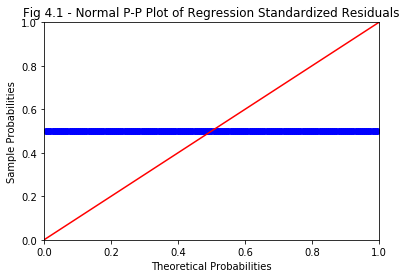

In [33]:
adv_resid = model.resid # Checking normality
probplot = sm.ProbPlot( adv_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show() 

In [34]:
def get_standardized_values( vals ): #Checking homoscedasticity
 return (vals - vals.mean())/vals.std() 

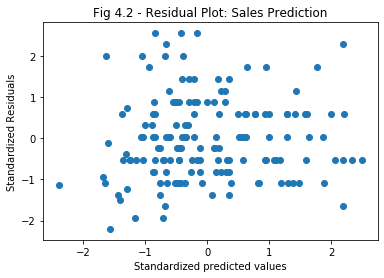

In [55]:
plt.scatter( get_standardized_values( model.fittedvalues ),
get_standardized_values( adv_resid ) )
plt.title( "Fig 4.2 - Residual Plot: Sales Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals"); 

##### B. Outlier Analysis

In [36]:
from scipy.stats import zscore 


In [37]:
adv['z_score_sales'] = zscore( adv.Sales ) # Z-score

In [38]:
adv[ (adv.z_score_sales > 3.0) | (adv.z_score_sales < -3.0) ] 

,Sno,TV,Radio,Newspaper,Day,Sales,z_score_sales


In [39]:
import numpy as np


C:\Users\bhumi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


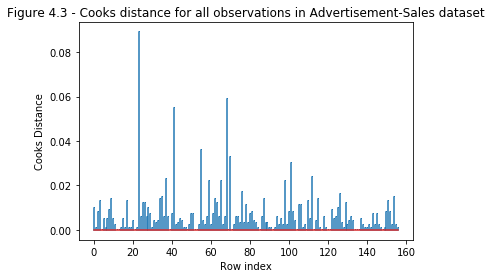

In [57]:
adv_influence = model.get_influence() #Cook's Distance
(c, p) = adv_influence.cooks_distance
plt.stem( np.arange( len( train_X) ),
np.round( c, 3 ),
markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in Advertisement-Sales dataset" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance"); 


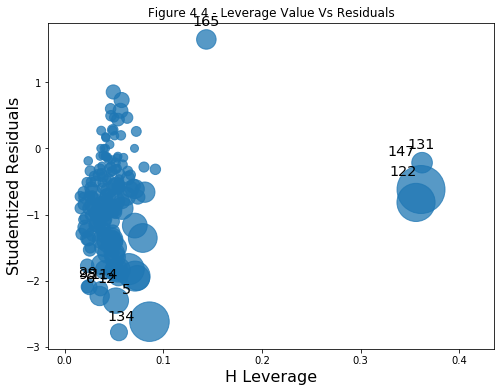

In [42]:
from statsmodels.graphics.regressionplots import influence_plot #Leverage Values
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( model, ax = ax )
plt.title( "Figure 4.4 - Leverage Value Vs Residuals")
plt.show(); 

#### 5. Visualisation Grpahs and Inference

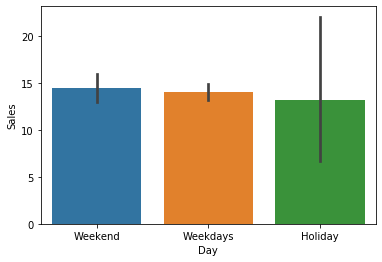

In [43]:
sn.barplot(x = 'Day', y = 'Sales', data = adv)

In [44]:
# Inference: Sales is the highest during weekends and least on holidays.

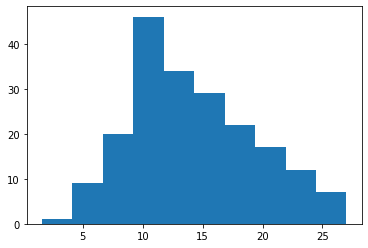

In [45]:
plt.hist( adv_encoded['Sales'] );

In [46]:
# Inference: Highest daily sales achieved is near Rs 10 million.

#### 8. Calculating RMSE

In [50]:
pred_y = np.power( model.predict( test_X[train_X.columns] ), 2) #Making predictions

In [51]:
from sklearn import metrics # For calculations

In [52]:
np.sqrt(metrics.mean_squared_error(pred_y, test_y)) # Checking RMSE

265.04789454926845

In [53]:
np.round( metrics.r2_score(pred_y, test_y), 2 ) 

-2.01